In [31]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import pyaudio
import scipy

In [25]:
#ask for name, to personalize the user experience
user_name = input('Please enter your name')

Please enter your nameboo


In [26]:
print("Hello",user_name,"\nThanks for using my audio filtering tool :)")
print("Let's get started!\n")

#ask the user what type of input they want to use
option = input("Would you like to design your own filter using ,\nA.LCCDE coefficients?\nB. poles and zeros of transfer function H(z)?\nC. impulse response h[n]?\n(or D. You can look at a demo of some of the popular filters in the industry\n")

Hello boo 
Thanks for using my audio filtering tool :)
Let's get started!

Would you like to design your own filter using ,
A.LCCDE coefficients?
B. poles and zeros of transfer function H(z)?
C. impulse response h[n]?
(or D. You can look at a demo of some of the popular filters in the industry
A


In [27]:
#main block for constructing the filter
if option == 'A' or option == 'a':
    print("Cool! lesgoooo")
elif option == 'B' or option == 'b':
    print("meh")
elif option == 'C' or option == 'c':
    print("butt")
elif option == 'D' or option == 'd':
    print("i'm not sleepy")
else:
    option = input('Enter a valid option (A/B/C/D)')

Cool! lesgoooo


In [30]:
print("Oh wait, let's start with taking your audio input\nRun the next cell to give input")

Oh wait, let's start with taking your audio input
Run the next cell to give input


In [48]:
save_rep = input('Oh wait! do you want to save your audio in a new file? (Y/N)\n')
if save_rep == 'Y' or save_red == 'y':
    WAVE_OUTPUT_FILENAME = "savedfile.wav"
else:
    WAVE_OUTPUT_FILENAME = "output.wav"
secs = int(input("How long do you want the input to be (in seconds)?\n")) 

Oh wait! do you want to save your audio in a new file? (Y/N)
Y
How long do you want the input to be (in seconds)?
3


* recording
Audio recorded!
Now let's move on to filtering the output!


/home/randomshit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:41: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/home/randomshit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:41: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


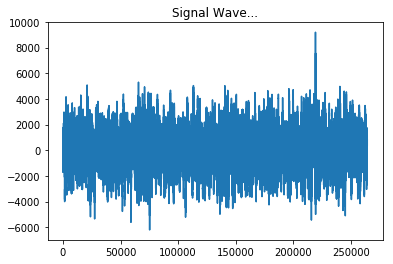

In [49]:
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
RECORD_SECONDS = secs

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("Audio recorded!")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

#sleep for a few secs?

play = input("Want to listen to your raw input? (Y/N)\n")

if play == 'Y' or play == 'y':
    #play audio code here

#sleep
print("Here's a plot of your raw input!")
spf = wave.open(WAVE_OUTPUT_FILENAME, 'r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')

plt.figure(1)
plt.title('Signal Wave...')
plt.plot(signal)

